# Crop production analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('crop_production.csv')

In [3]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


## Exploratory Data Analysis and Data Pre-processing

In [4]:
data.shape

(246091, 7)

In [5]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [6]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [7]:
# viewing unique crops available in the dataset

data['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [9]:
# Checking missing values of the dataset in each column

data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [10]:
# Dropping missing values 

data = data.dropna()

In [11]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [12]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

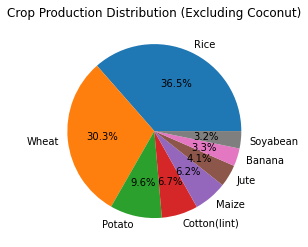

In [13]:
new_df =  data.groupby('Crop')['Production'].sum().reset_index()
sorted_prod = new_df.sort_values(by='Production', ascending=False)
sorted_prod

plot_pie = sorted_prod[2:10]
# plot_pie

crop_names = plot_pie['Crop']
production_values = plot_pie['Production']

plt.pie(production_values, labels=crop_names, autopct='%1.1f%%')

plt.title('Crop Production Distribution (Excluding Coconut)')

plt.show()

## Prominent crops in Andhra Pradesh

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Sugarcane'),
  Text(1, 0, 'Rice'),
  Text(2, 0, 'Maize'),
  Text(3, 0, 'Groundnut'),
  Text(4, 0, 'Cotton(lint)'),
  Text(5, 0, 'Banana')])

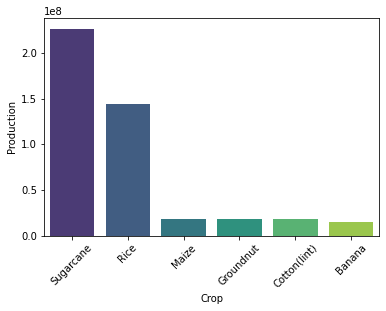

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df1 = data

andhra_data = df1[df1['State_Name'] == 'Andhra Pradesh']

crop_production = andhra_data.groupby('Crop')['Production'].sum().reset_index()

prominent_crops = crop_production.sort_values('Production', ascending=False)

top_6_crops = prominent_crops.iloc[1:7]

sns.barplot(x='Crop', y='Production', data=top_6_crops, palette='viridis')
plt.xticks(rotation=45)

## Prominent crops in Kerala

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Tapioca'),
  Text(1, 0, 'Rice'),
  Text(2, 0, 'Banana'),
  Text(3, 0, 'Sugarcane'),
  Text(4, 0, 'Arecanut'),
  Text(5, 0, 'Mango')])

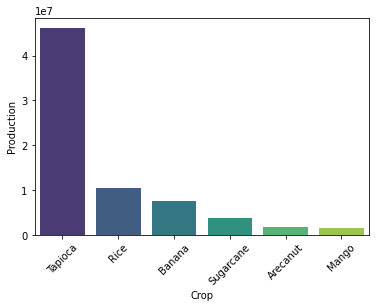

In [15]:
df2 = data

kerala_data = df2[df2['State_Name'] == 'Kerala']

crop_production = kerala_data.groupby('Crop')['Production'].sum().reset_index()

prominent_crops = crop_production.sort_values('Production', ascending=False)

top_6_crops = prominent_crops.iloc[1:7]

sns.barplot(x='Crop', y='Production', data=top_6_crops, palette='viridis')
plt.xticks(rotation=45)

In [16]:
# Displaying State Names present in the dataset

data['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [17]:
# Adding a new column Yield which indicates Production per unit Area. 

data['Yield'] = (data['Production'] / data['Area'])
data.head()

/var/folders/5f/zvvxs6012zn4htwxbbkh2mvh0000gn/T/ipykernel_997/3473205621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Yield'] = (data['Production'] / data['Area'])


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167


## Visualizing the dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

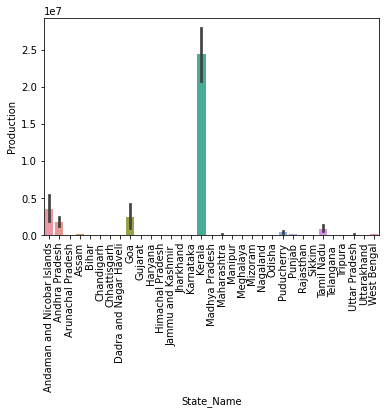

In [18]:
sns.barplot(x = 'State_Name', y = 'Production', data=data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

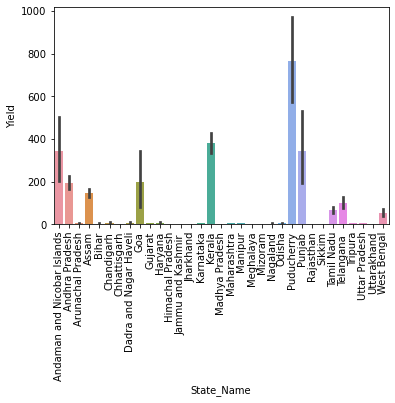

In [19]:
sns.barplot(x = 'State_Name', y = 'Yield', data = data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

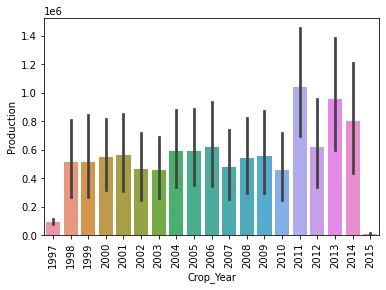

In [20]:
sns.barplot(x = 'Crop_Year', y = 'Production', data = data)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Kharif     '),
  Text(1, 0, 'Whole Year '),
  Text(2, 0, 'Autumn     '),
  Text(3, 0, 'Rabi       '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Winter     ')])

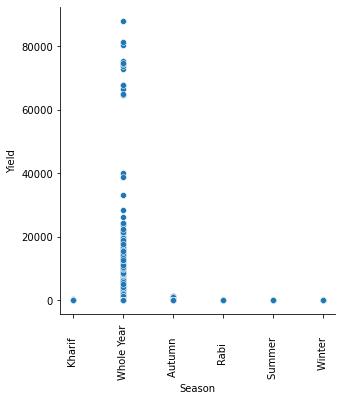

In [21]:
sns.relplot(x = 'Season', y = 'Yield', data = data)
plt.xticks(rotation = 90)

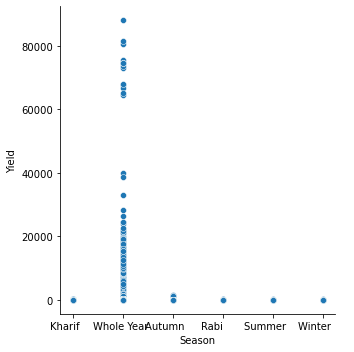

In [22]:
sns.relplot(y = 'Yield', x = 'Season', data = data)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Kharif     '),
  Text(1, 0, 'Whole Year '),
  Text(2, 0, 'Autumn     '),
  Text(3, 0, 'Rabi       '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Winter     ')])

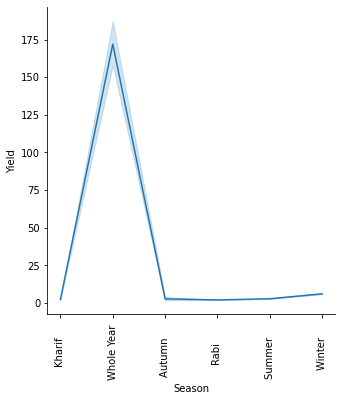

In [23]:
sns.relplot(x = 'Season', y = 'Yield', data = data, kind = 'line')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Kharif     '),
  Text(1, 0, 'Whole Year '),
  Text(2, 0, 'Autumn     '),
  Text(3, 0, 'Rabi       '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Winter     ')])

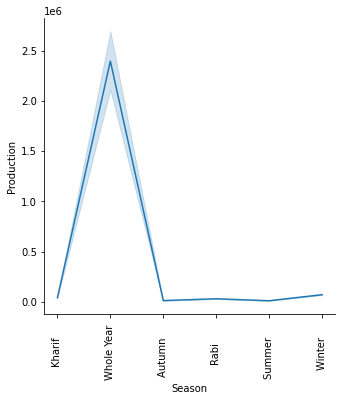

In [24]:
sns.relplot(x = 'Season', y = 'Production', data = data, kind = 'line')
plt.xticks(rotation = 90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123]),
 [Text(0, 0, 'Arecanut'),
  Text(1, 0, 'Other Kharif pulses'),
  Text(2, 0, 'Rice'),
  Text(3, 0, 'Banana'),
  Text(4, 0, 'Cashewnut'),
  Text(5, 0, 'Coconut '),
  Text(6, 0, 'Dry ginger'),
  Text(7, 0, 'Sugarcane'),
  Text(8, 0, 'Sweet potato'),
  Text(9, 0, 'Tapioca'),
  Text(10, 0, 'Black peppe

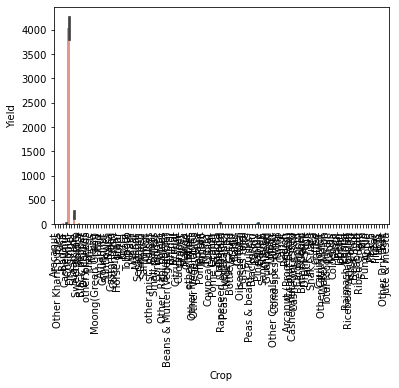

In [25]:
sns.barplot(x = 'Crop', y = 'Yield', data = data)
plt.xticks(rotation = 90)

## Analyzing each type of crop

In [26]:
# 1) Rice

In [27]:
rice_data = data[data['Crop'] == 'Rice']

In [28]:
rice_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,3.147059
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,3.614458
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2.700000
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,1.734038
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797
...,...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.00,1274.00,2.468992
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.00,2.415477
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00,2.731061
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00,2.617647


In [29]:
rice_data.shape

(15082, 8)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Kharif     '),
  Text(1, 0, 'Autumn     '),
  Text(2, 0, 'Rabi       '),
  Text(3, 0, 'Whole Year '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Winter     ')])

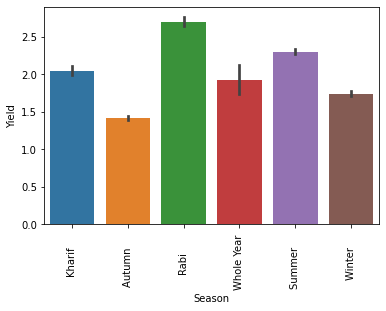

In [30]:
sns.barplot(x = 'Season', y = 'Yield', data = rice_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

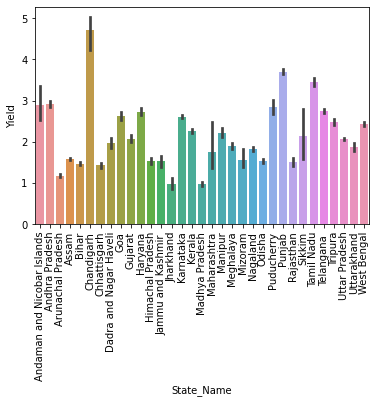

In [31]:
sns.barplot(x = 'State_Name', y = 'Yield', data = rice_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

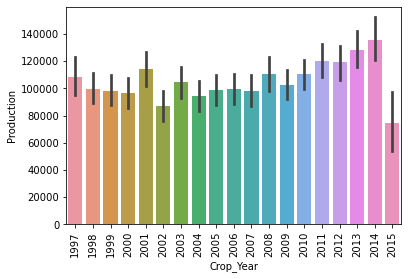

In [32]:
sns.barplot(x = 'Crop_Year', y = 'Production', data = rice_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

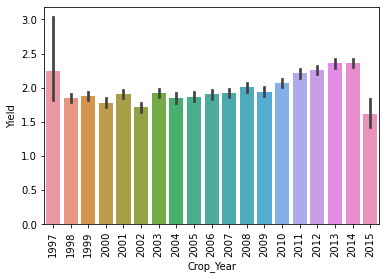

In [33]:
sns.barplot(x = 'Crop_Year', y = 'Yield', data = rice_data)
plt.xticks(rotation = 90)

In [34]:
# 2) WHEAT

In [35]:
wheat_data = data[data['Crop'] == 'Wheat']

In [36]:
wheat_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
230,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0,0.666667
255,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0,0.500000
284,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0,0.669704
326,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0,0.571154
372,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0,0.693811
...,...,...,...,...,...,...,...,...
245949,West Bengal,PURULIA,2010,Rabi,Wheat,2013.0,5152.0,2.559364
245980,West Bengal,PURULIA,2011,Rabi,Wheat,1880.0,4206.0,2.237234
246012,West Bengal,PURULIA,2012,Rabi,Wheat,1648.0,3310.0,2.008495
246047,West Bengal,PURULIA,2013,Rabi,Wheat,1187.0,2675.0,2.253580


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Rabi       '),
  Text(1, 0, 'Whole Year '),
  Text(2, 0, 'Winter     '),
  Text(3, 0, 'Kharif     '),
  Text(4, 0, 'Summer     ')])

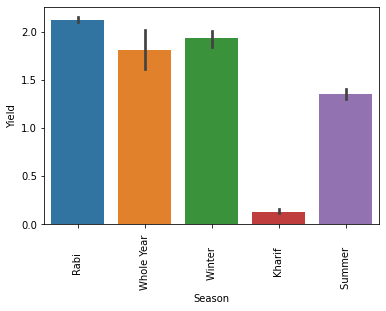

In [37]:
sns.barplot(x = 'Season', y = 'Yield', data = wheat_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Arunachal Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Jammu and Kashmir '),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Karnataka'),
  Text(13, 0, 'Kerala'),
  Text(14, 0, 'Madhya Pradesh'),
  Text(15, 0, 'Maharashtra'),
  Text(16, 0, 'Meghalaya'),
  Text(17, 0, 'Mizoram'),
  Text(18, 0, 'Nagaland'),
  Text(19, 0, 'Odisha'),
  Text(20, 0, 'Punjab'),
  Text(21, 0, 'Rajasthan'),
  Text(22, 0, 'Sikkim'),
  Text(23, 0, 'Tamil Nadu'),
  Text(24, 0, 'Telangana '),
  Text(25, 0, 'Tripura'),
  Text(26, 0, 'Uttar Pradesh'),
  Text(27, 0, 'Uttarakhand'),
  Text(28, 0, 'West Bengal')])

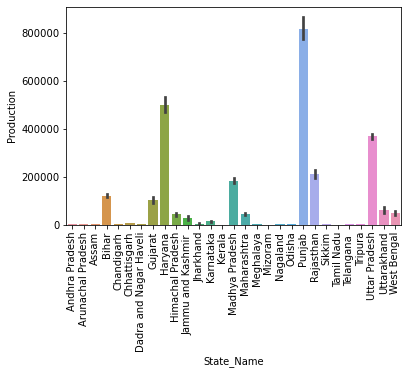

In [38]:
sns.barplot(x = 'State_Name', y = 'Production', data = wheat_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

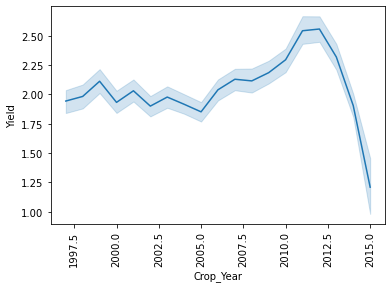

In [39]:
sns.lineplot(x = 'Crop_Year', y = 'Yield', data = wheat_data)
plt.xticks(rotation = 90)

In [40]:
# 3) COCONUT

In [41]:
coconut_data = data[data['Crop'] == 'Urad']

In [42]:
coconut_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
75,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Urad,1.5,1.16,0.773333
125,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Urad,1059.5,458.79,0.433025
199,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Rabi,Urad,34.0,15.05,0.442647
270,Andhra Pradesh,ANANTAPUR,1999,Kharif,Urad,4.0,2.00,0.500000
309,Andhra Pradesh,ANANTAPUR,2000,Kharif,Urad,135.0,8.00,0.059259
...,...,...,...,...,...,...,...,...
246000,West Bengal,PURULIA,2012,Kharif,Urad,9258.0,2910.00,0.314323
246011,West Bengal,PURULIA,2012,Rabi,Urad,259.0,133.00,0.513514
246033,West Bengal,PURULIA,2013,Kharif,Urad,12986.0,2877.00,0.221546
246070,West Bengal,PURULIA,2014,Kharif,Urad,11493.0,3287.00,0.286000


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Rabi       '),
  Text(1, 0, 'Kharif     '),
  Text(2, 0, 'Summer     '),
  Text(3, 0, 'Autumn     '),
  Text(4, 0, 'Winter     '),
  Text(5, 0, 'Whole Year ')])

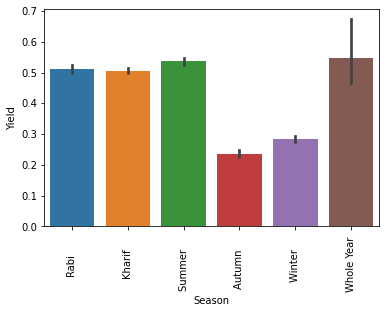

In [43]:
sns.barplot(x = 'Season', y = 'Yield', data = coconut_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Jammu and Kashmir '),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Maharashtra'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Nagaland'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Punjab'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana '),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'West Bengal')])

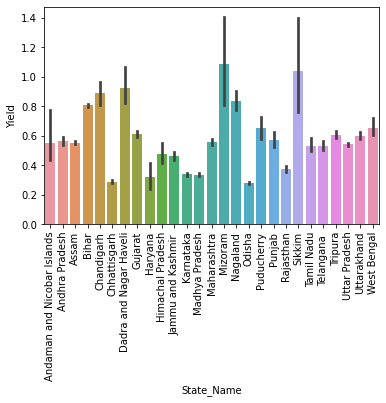

In [44]:
sns.barplot(x = 'State_Name', y = 'Yield', data = coconut_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Jammu and Kashmir '),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Maharashtra'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Nagaland'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Punjab'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana '),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'West Bengal')])

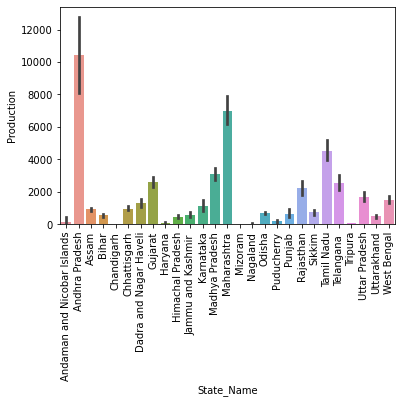

In [45]:
sns.barplot(x = 'State_Name', y = 'Production', data = coconut_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

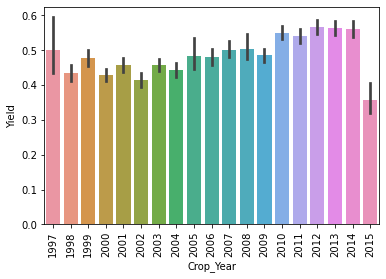

In [46]:
sns.barplot(x = 'Crop_Year', y = 'Yield', data = coconut_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

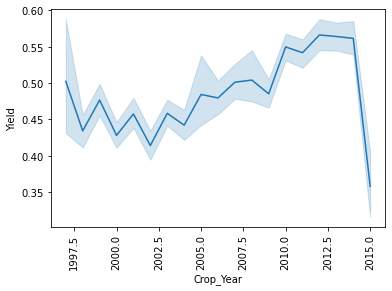

In [47]:
sns.lineplot(x = 'Crop_Year', y = 'Yield', data = coconut_data)
plt.xticks(rotation = 90)

In [48]:
# 4) POTATO

In [49]:
potato_data = data[data['Crop'] == 'Potato']

In [50]:
potato_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
331,Andhra Pradesh,ANANTAPUR,2000,Whole Year,Potato,4.0,34.0,8.500000
433,Andhra Pradesh,ANANTAPUR,2002,Whole Year,Potato,2.0,17.0,8.500000
530,Andhra Pradesh,ANANTAPUR,2004,Whole Year,Potato,2.0,20.0,10.000000
745,Andhra Pradesh,ANANTAPUR,2010,Whole Year,Potato,21.0,236.0,11.238095
792,Andhra Pradesh,ANANTAPUR,2011,Whole Year,Potato,18.0,181.0,10.055556
...,...,...,...,...,...,...,...,...
245945,West Bengal,PURULIA,2010,Rabi,Potato,977.0,15920.0,16.294780
245976,West Bengal,PURULIA,2011,Rabi,Potato,1077.0,17412.0,16.167131
246008,West Bengal,PURULIA,2012,Rabi,Potato,913.0,17203.0,18.842278
246043,West Bengal,PURULIA,2013,Rabi,Potato,1726.0,43703.0,25.320394


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Whole Year '),
  Text(1, 0, 'Rabi       '),
  Text(2, 0, 'Kharif     '),
  Text(3, 0, 'Winter     '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Autumn     ')])

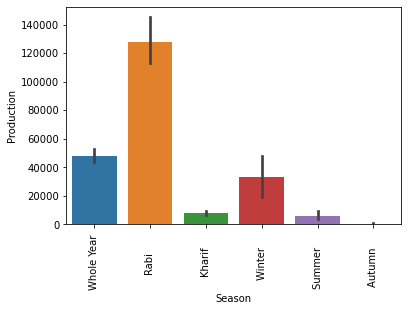

In [51]:
sns.barplot(x = 'Season', y = 'Production', data = potato_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Arunachal Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Gujarat'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Himachal Pradesh'),
  Text(9, 0, 'Jammu and Kashmir '),
  Text(10, 0, 'Jharkhand'),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Kerala'),
  Text(13, 0, 'Madhya Pradesh'),
  Text(14, 0, 'Manipur'),
  Text(15, 0, 'Meghalaya'),
  Text(16, 0, 'Mizoram'),
  Text(17, 0, 'Nagaland'),
  Text(18, 0, 'Odisha'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana '),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'West Bengal')])

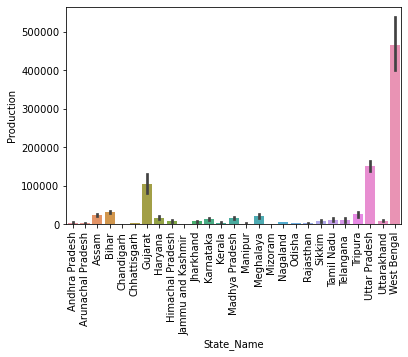

In [52]:
sns.barplot(x = 'State_Name', y = 'Production', data = potato_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

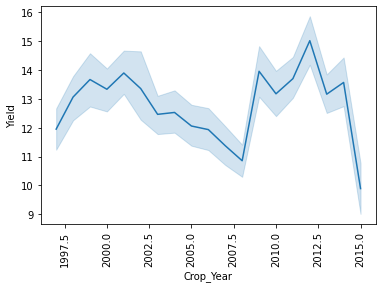

In [53]:
sns.lineplot(x = 'Crop_Year', y = 'Yield', data = potato_data)
plt.xticks(rotation = 90)

In [54]:
# 5) ONION

In [55]:
onion_data = data[data['Crop'] == 'Onion']

In [56]:
onion_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
286,Andhra Pradesh,ANANTAPUR,1999,Whole Year,Onion,1770.0,32364.0,18.284746
300,Andhra Pradesh,ANANTAPUR,2000,Kharif,Onion,1103.0,15470.0,14.025385
320,Andhra Pradesh,ANANTAPUR,2000,Rabi,Onion,482.0,11514.0,23.887967
348,Andhra Pradesh,ANANTAPUR,2001,Kharif,Onion,1165.0,19232.0,16.508155
365,Andhra Pradesh,ANANTAPUR,2001,Rabi,Onion,380.0,8465.0,22.276316
...,...,...,...,...,...,...,...,...
236375,Uttarakhand,UTTAR KASHI,2010,Whole Year,Onion,47.0,306.0,6.510638
236398,Uttarakhand,UTTAR KASHI,2011,Whole Year,Onion,8.0,52.0,6.500000
236420,Uttarakhand,UTTAR KASHI,2012,Whole Year,Onion,23.0,150.0,6.521739
236443,Uttarakhand,UTTAR KASHI,2013,Whole Year,Onion,32.0,212.0,6.625000


<AxesSubplot:xlabel='Season', ylabel='Yield'>

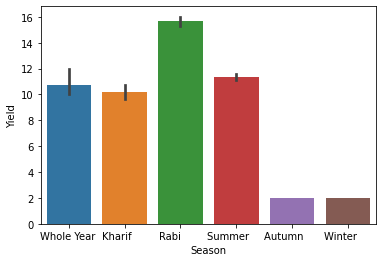

In [57]:
sns.barplot(x = 'Season', y = 'Yield', data = onion_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Chhattisgarh'),
  Text(5, 0, 'Gujarat'),
  Text(6, 0, 'Haryana'),
  Text(7, 0, 'Himachal Pradesh'),
  Text(8, 0, 'Jammu and Kashmir '),
  Text(9, 0, 'Jharkhand'),
  Text(10, 0, 'Karnataka'),
  Text(11, 0, 'Madhya Pradesh'),
  Text(12, 0, 'Maharashtra'),
  Text(13, 0, 'Manipur'),
  Text(14, 0, 'Odisha'),
  Text(15, 0, 'Puducherry'),
  Text(16, 0, 'Rajasthan'),
  Text(17, 0, 'Tamil Nadu'),
  Text(18, 0, 'Telangana '),
  Text(19, 0, 'Uttar Pradesh'),
  Text(20, 0, 'Uttarakhand')])

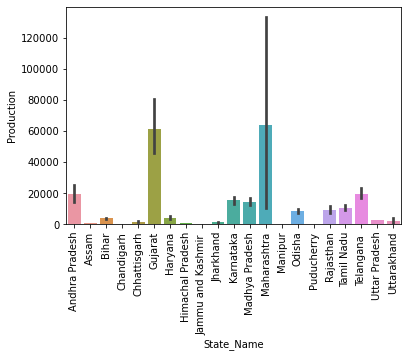

In [58]:
sns.barplot(x = 'State_Name', y = 'Production', data = onion_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

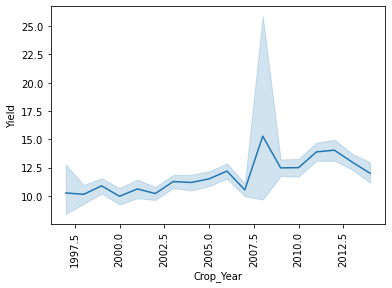

In [59]:
sns.lineplot(x = 'Crop_Year', y = 'Yield', data = onion_data)
plt.xticks(rotation = 90)

In [60]:
# 6) MAIZE

In [61]:
maize_data = data[data['Crop'] == 'Maize']

In [62]:
maize_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
71,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Maize,3.84,18.22,4.744792
120,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Maize,86.70,96.40,1.111880
194,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Rabi,Maize,73.00,253.00,3.465753
212,Andhra Pradesh,ANANTAPUR,1997,Kharif,Maize,2800.00,4900.00,1.750000
226,Andhra Pradesh,ANANTAPUR,1997,Rabi,Maize,600.00,2400.00,4.000000
...,...,...,...,...,...,...,...,...
246013,West Bengal,PURULIA,2012,Summer,Maize,290.00,476.00,1.641379
246020,West Bengal,PURULIA,2013,Autumn,Maize,6189.00,10665.00,1.723219
246048,West Bengal,PURULIA,2013,Summer,Maize,325.00,522.00,1.606154
246056,West Bengal,PURULIA,2014,Autumn,Maize,6317.00,13337.00,2.111287


<AxesSubplot:xlabel='Season', ylabel='Yield'>

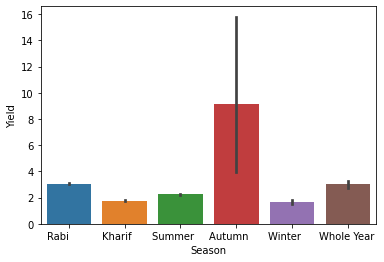

In [63]:
sns.barplot(x = 'Season', y = 'Yield', data = maize_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Gujarat'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Himachal Pradesh'),
  Text(11, 0, 'Jammu and Kashmir '),
  Text(12, 0, 'Jharkhand'),
  Text(13, 0, 'Karnataka'),
  Text(14, 0, 'Kerala'),
  Text(15, 0, 'Madhya Pradesh'),
  Text(16, 0, 'Maharashtra'),
  Text(17, 0, 'Manipur'),
  Text(18, 0, 'Meghalaya'),
  Text(19, 0, 'Mizoram'),
  Text(20, 0, 'Nagaland'),
  Text(21, 0, 'Odisha'),
  Text(22, 0, 'Punjab'),
  Text(23, 0, 'Rajasthan'),
  Text(24, 0, 'Sikkim'),
  Text(25, 0, 'Tamil Nadu'),
  Text(26, 0, 'Telangana '),
  Text(27, 0, 'Tripura'),
  Text(28, 0, 'Uttar Pradesh'),
  Text(29,

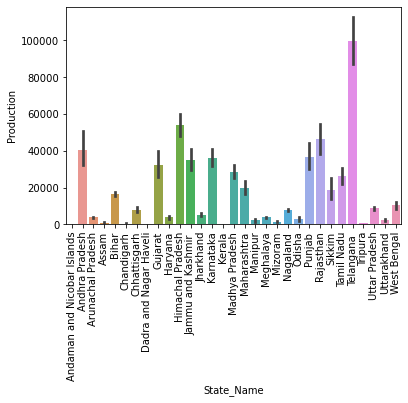

In [64]:
sns.barplot(x = 'State_Name', y = 'Production', data = maize_data)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='Crop_Year', ylabel='Yield'>

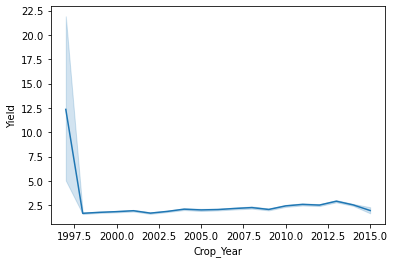

In [65]:
sns.lineplot(x = 'Crop_Year', y = 'Yield', data = maize_data)